In [50]:
import numpy as np 
import pandas as pd  
import os
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier




#  Explore the data (EDA)

In [7]:
#show the data frame
data = pd.read_csv("VA lung cancer data.csv")
data

Treatment  Cell_type  Number_days  Status  Karnofsky_score  \
0            1          1           72       1               60   
1            1          1          411       1               70   
2            1          1          228       1               60   
3            1          1          126       1               60   
4            1          1          118       1               70   
..         ...        ...          ...     ...              ...   
132          2          4          133       1               75   
133          2          4          111       1               60   
134          2          4          231       1               70   
135          2          4          378       1               80   
136          2          4           49       1               30   

     Months_Diagnosis   Age  Prior_therapy  
0                    7   69              0  
1                    5   64             10  
2                    3   38              0  
3                    9   63             10  
4                   11   65             10  
..                 ...  ...            ...  
132                  1   65              0  
133                  5   64              0  
134                 18   67             10  
135                  4   65              0  
136                  3   37              0  

[137 rows x 8 columns]

In [9]:
#total numbers for rows and the total number of columns
data.shape

(137, 8)

In [11]:
#overall information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Treatment          137 non-null    int64
 1   Cell_type          137 non-null    int64
 2   Number_days        137 non-null    int64
 3   Status             137 non-null    int64
 4   Karnofsky_score    137 non-null    int64
 5   Months_Diagnosis   137 non-null    int64
 6   Age                137 non-null    int64
 7   Prior_therapy      137 non-null    int64
dtypes: int64(8)
memory usage: 8.7 KB


In [75]:
# Drop rows with missing values
data.dropna(inplace=True)

In [12]:
 data.describe()

Treatment   Cell_type  Number_days      Status  Karnofsky_score  \
count  137.000000  137.000000   137.000000  137.000000       137.000000   
mean     1.496350    2.335766   121.627737    0.934307        58.569343   
std      0.501821    1.066036   157.816722    0.248655        20.039592   
min      1.000000    1.000000     1.000000    0.000000        10.000000   
25%      1.000000    1.000000    25.000000    1.000000        40.000000   
50%      1.000000    2.000000    80.000000    1.000000        60.000000   
75%      2.000000    3.000000   144.000000    1.000000        75.000000   
max      2.000000    4.000000   999.000000    1.000000        99.000000   

       Months_Diagnosis          Age  Prior_therapy  
count         137.000000  137.000000     137.000000  
mean            8.773723   58.306569       2.919708  
std            10.612141   10.541628       4.563375  
min             1.000000   34.000000       0.000000  
25%             3.000000   51.000000       0.000000  
50%             5.000000   62.000000       0.000000  
75%            11.000000   66.000000      10.000000  
max            87.000000   81.000000      10.000000

In [13]:
data.dtypes 

Treatment            int64
Cell_type            int64
Number_days          int64
Status               int64
Karnofsky_score      int64
Months_Diagnosis     int64
Age                  int64
Prior_therapy        int64
dtype: object

In [18]:
data.head(9)

Treatment  Cell_type  Number_days  Status  Karnofsky_score  \
0          1          1           72       1               60   
1          1          1          411       1               70   
2          1          1          228       1               60   
3          1          1          126       1               60   
4          1          1          118       1               70   
5          1          1           10       1               20   
6          1          1           82       1               40   
7          1          1          110       1               80   
8          1          1          314       1               50   

   Months_Diagnosis   Age  Prior_therapy  
0                  7   69              0  
1                  5   64             10  
2                  3   38              0  
3                  9   63             10  
4                 11   65             10  
5                  5   49              0  
6                 10   69             10  
7                 29   68              0  
8                 18   43              0

# Data Visualization

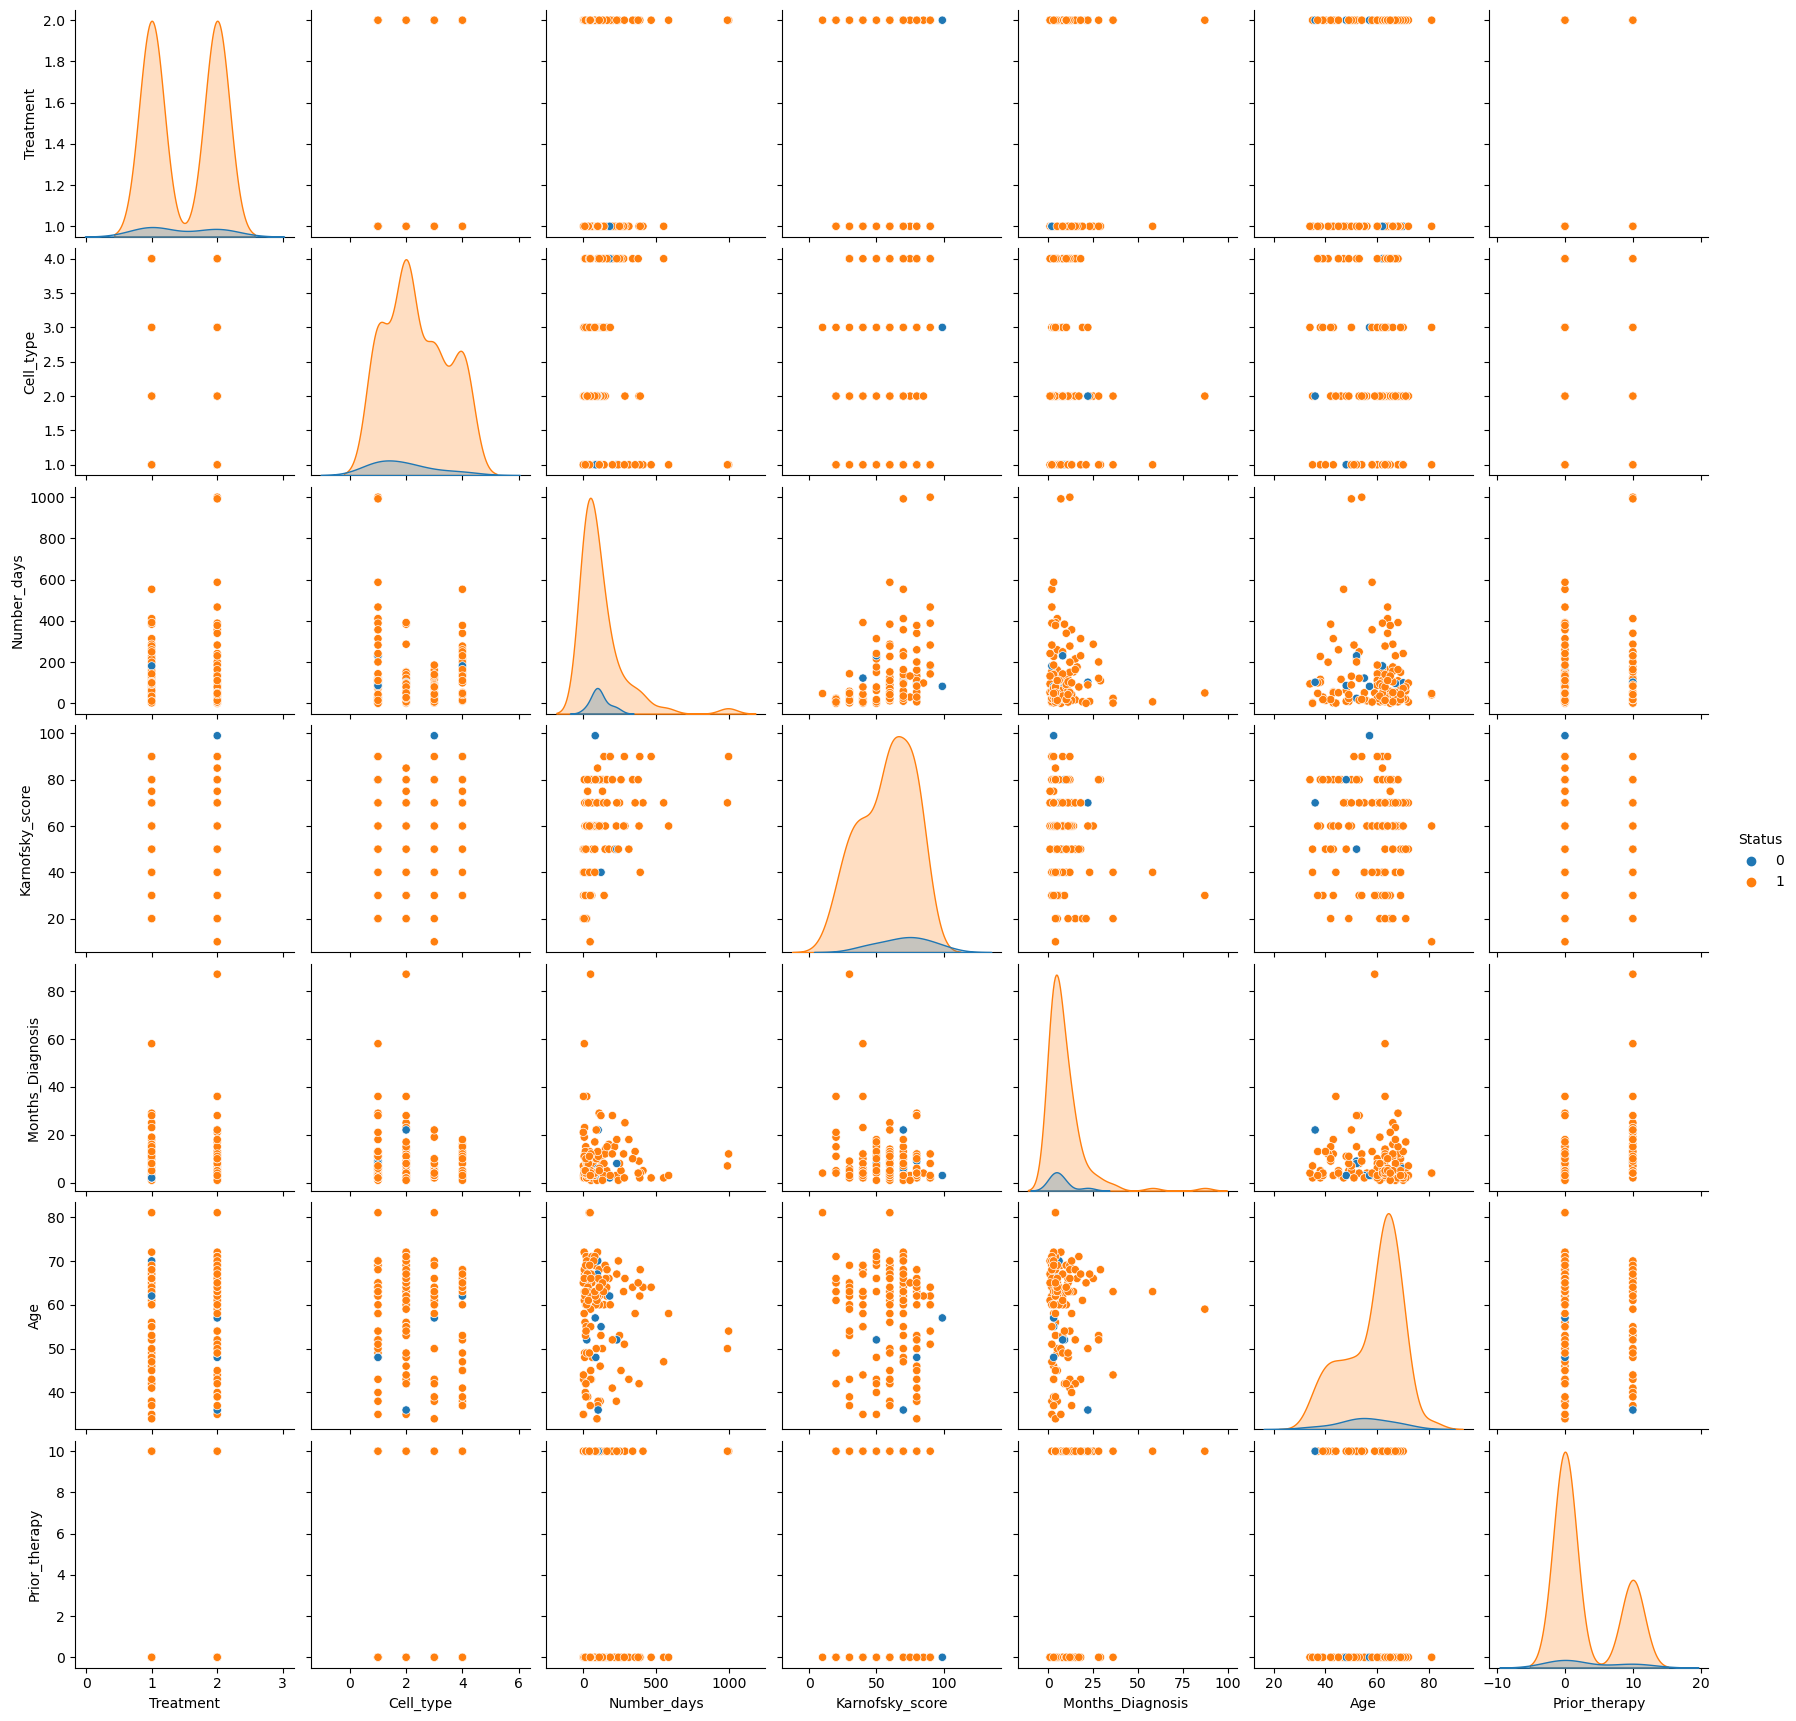

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.pairplot(data, hue='Status')
plt.show()

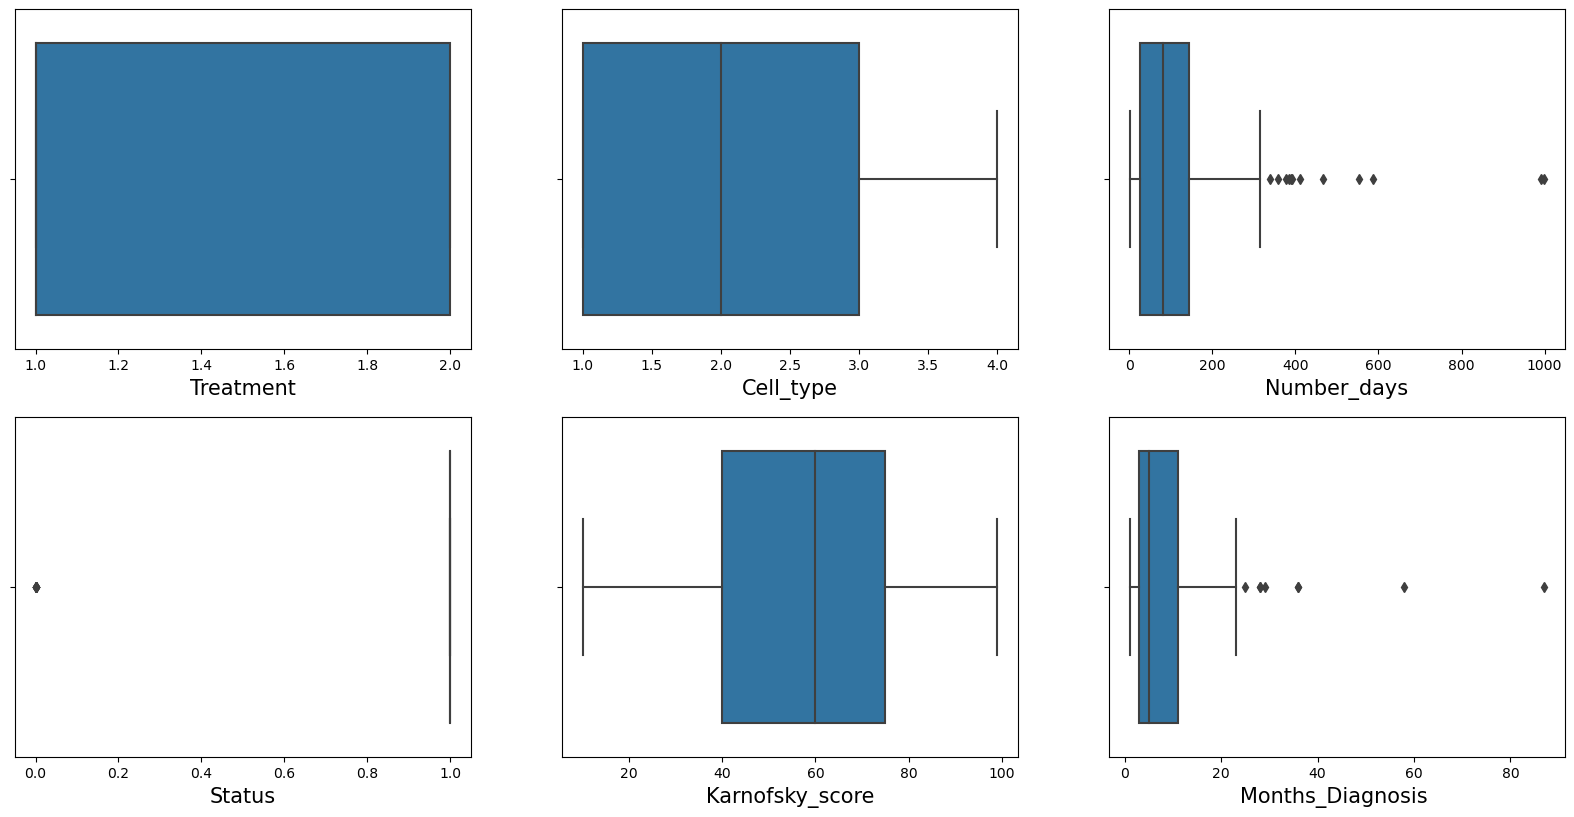

In [16]:
plt.figure(figsize=(20,15))
for i,col in enumerate(data.iloc[:,0:6]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=data.iloc[:,0:6],x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

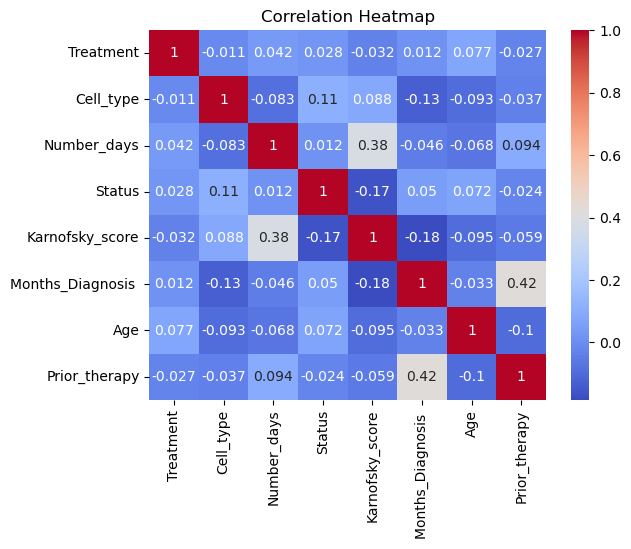

In [17]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

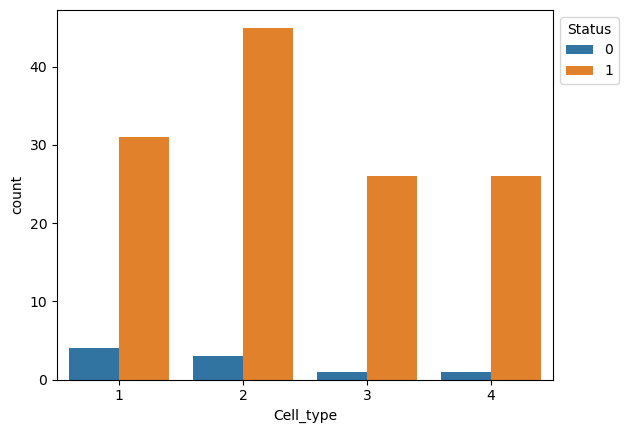

In [21]:
country_subsType_graph=sns.countplot(data= data,  hue='Status',x='Cell_type')
sns.move_legend(country_subsType_graph,"upper left",bbox_to_anchor=(1,1))
plt.show()


# Machine Learning

In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(['Status'], axis=1)
y = data['Status']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=42)


In [27]:
y_train

60     1
122    1
93     1
44     1
15     1
      ..
71     0
106    1
14     1
92     1
102    1
Name: Status, Length: 95, dtype: int64

# LogisticRegression

In [39]:

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy:", acc)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Logistic Regression model accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        41

    accuracy                           0.98        42
   macro avg       0.49      0.50      0.49        42
weighted avg       0.95      0.98      0.96        42

[[ 0  1]
 [ 0 41]]
Mean Squared Error: 0.023809523809523808


C:\Users\Mariya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

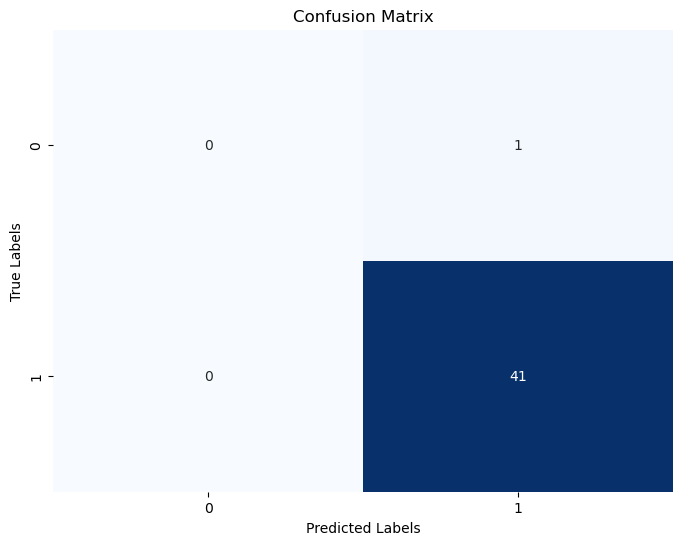

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Random Forest model


In [43]:
# Create the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [45]:
# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate the mean squared error as a measure of the model's performance
mse = mean_squared_error(y_test, y_pred)
accuracy = clf.score(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print("Accuracy:", accuracy)

Mean Squared Error: 0.035802380952380954
Accuracy: 0.9761904761904762
